# PyBer

In [1]:
#  add inline magic
%matplotlib inline

# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
import os # in case we need to merge files from an unknown path

# get the files
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# read files into DFs

city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [2]:
city_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [3]:
ride_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [4]:
# inspect the data for city_df

city_df.count()
# same number of data points per column

city            120
driver_count    120
type            120
dtype: int64

In [5]:
city_df.isnull().sum()
# no cells are null

city            0
driver_count    0
type            0
dtype: int64

In [6]:
city_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [7]:
# show unique values in column "type"
city_df["type"].unique()
# shows 3 conditions for "type"

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [8]:
# shows how many datapoints for the condition "urban"
sum(city_df["type"]=="Urban")

66

In [9]:
# shows how many datapoints for the condition "suburban"
sum(city_df["type"]=="Suburban")

36

In [10]:
# shows how many datapoints for the condition "rural"
sum(city_df["type"]=="Rural")

18

In [11]:
# inspect the data for ride_df
ride_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [12]:
# merge dfs to one df

pyber_df = pd.merge(ride_df, city_df, how="left", on=["city", "city"])
pyber_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [13]:
# use filtering to create a df per TYPE
# make one DF for each of the 3 TYPES
urban_df = pyber_df[pyber_df["type"] == "Urban"]
urban_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [14]:
suburban_df = pyber_df[pyber_df["type"] == "Suburban"]
suburban_df.head(10)

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban
1630,East Marymouth,2019-03-29 08:36:20,37.60,6370863861570,5,Suburban
1631,New Raymond,2019-02-25 21:40:18,20.44,5984505117874,17,Suburban
1632,Lake Robertside,2019-01-11 20:17:36,46.51,6574333011308,4,Suburban
1633,Josephside,2019-03-30 09:45:11,44.74,5592692102803,25,Suburban
1634,Brandonfort,2019-01-14 12:35:27,28.02,8100258078935,10,Suburban


In [15]:
rural_df = pyber_df[pyber_df["type"] == "Rural"]
rural_df.head(10)

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural
2255,Taylorhaven,2019-04-06 01:01:29,45.31,2275364435623,1,Rural
2256,Garzaport,2019-02-18 18:27:48,36.16,2928337561347,7,Rural
2257,New Ryantown,2019-01-27 17:33:41,42.68,7994603753131,2,Rural
2258,Lake Latoyabury,2019-04-02 21:00:22,13.46,8232864757802,2,Rural
2259,North Holly,2019-02-16 17:02:51,39.46,4571476032148,8,Rural


In [16]:
#  create a DS with city as the index, group by # rides per city, 
# and count ride_ids for each group  
# ride_ids are good for this because each one is unique
# make a DS for each TYPE

urban_count = urban_df.groupby(["city"]).count()["ride_id"]
urban_count  # this is a DS with city as the index

city
Amandaburgh            18
Barajasview            22
Carriemouth            27
Christopherfurt        27
Deanville              19
                       ..
West Patrickchester    16
West Robert            31
West Samuelburgh       25
Williamsstad           23
Williamsview           20
Name: ride_id, Length: 66, dtype: int64

In [17]:
suburban_count = suburban_df.groupby(["city"]).count()["ride_id"]
rural_count = rural_df.groupby(["city"]).count()["ride_id"]

In [18]:
# create 3 DS for each city type
# grouped by city name (index)
# with ave fare per city
urban_avefare = urban_df.groupby(["city"]).mean()["fare"]
urban_avefare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [19]:
suburban_avefare = suburban_df.groupby(["city"]).mean()["fare"]
rural_avefare = rural_df.groupby(["city"]).mean()["fare"]

In [20]:
# create 3 DS for each city type
# grouped by city name (index)
# with AVE NUMBER of drivers per city
urban_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
urban_drivers.head

<bound method NDFrame.head of city
Amandaburgh            12.0
Barajasview            26.0
Carriemouth            52.0
Christopherfurt        41.0
Deanville              49.0
                       ... 
West Patrickchester    25.0
West Robert            39.0
West Samuelburgh       73.0
Williamsstad           59.0
Williamsview           46.0
Name: driver_count, Length: 66, dtype: float64>

In [21]:
suburban_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

Text(0.5, 0, 'Total Number of Rides (Per City)')

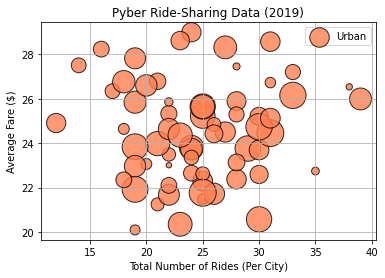

In [22]:
# Build the SCATTER BUBBLE PLOT for URBAN

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

Text(0.5, 0, 'Total Number of Rides (Per City)')

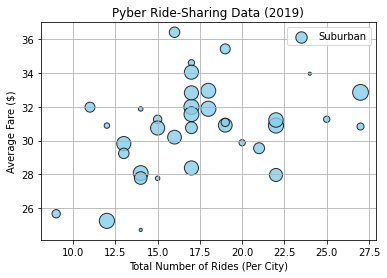

In [23]:
# Build the SCATTER BUBBLE PLOT for SUBURBAN
plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

Text(0.5, 0, 'Total Number of Rides (Per City)')

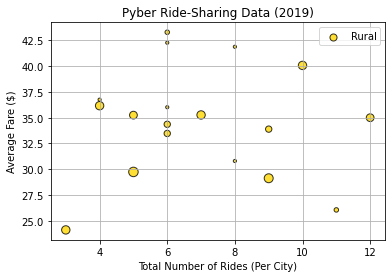

In [24]:
# Build the SCATTER BUBBLE PLOT for RURAL
plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

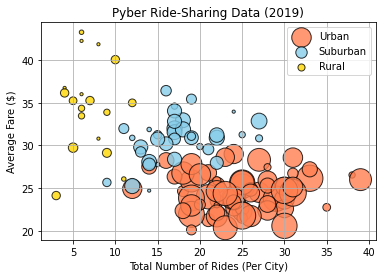

In [25]:
# combine all the plots together by running the code together

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )
plt.legend()
plt.title("Pyber Ride-Sharing Data (2019)")
plt.grid(True)
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")

plt.show()

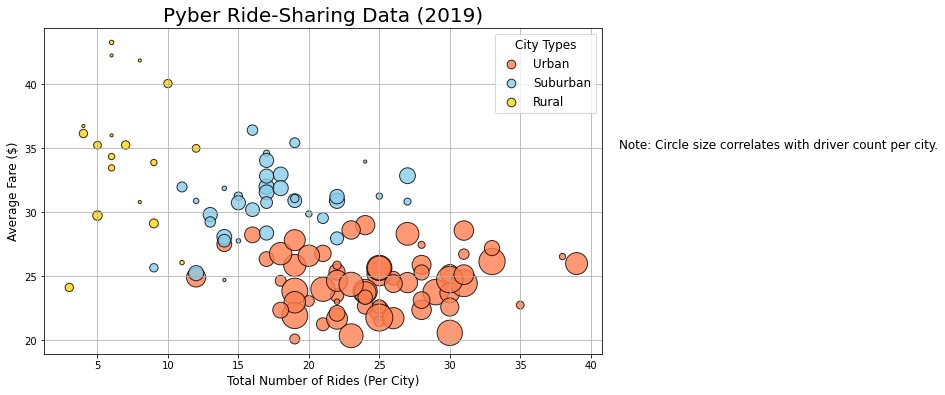

In [26]:
#  update with labels, title and increase fonts
#  pull out the redundencies and group 

plt.subplots(figsize=(10,6))  # increases overall size of the chart

plt.scatter(urban_count, urban_avefare, s=10*urban_drivers, color="coral", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Urban" )

plt.scatter(suburban_count, suburban_avefare, s=10*suburban_drivers, color="skyblue", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Suburban" )

plt.scatter(rural_count, rural_avefare, s=10*rural_drivers, color="gold", alpha=0.8,
           edgecolor="black", linewidths=1, label = "Rural" )

# group redundencies and increase font
plt.title("Pyber Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.legend()
plt.grid(True)

# note the legend dots are not the same size initially
# add parameters to correct
# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)  # Legend title font

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Save the figure
# Must do this before plt.show()
plt.savefig("analysis/Fig1.png")

plt.show()

In [27]:
#  MULTIPLE WAYS TO GET SUMMARY STATISTICS
# PANDAS .DESCRIBE()
# PANDAS .MEAN() .MEDIAN() .MODE()
# NUMPY .MEAN() .MEDIAN()
# SCIPY .MODE()

In [28]:
# get summary stats for num rides by city type

urban_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [29]:
urban_count.describe() 

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [30]:
urban_avefare.describe()

count    66.000000
mean     24.499122
std       2.190653
min      20.093158
25%      22.799102
50%      24.476732
75%      25.965357
max      28.993750
Name: fare, dtype: float64

In [31]:
suburban_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [32]:
rural_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [33]:
# Pandas mean(), median(), and mode() Methods
# Calculate the mean of the ride count for each city type.
# rounds to 2 decimal places
round(urban_count.mean(),2), round(suburban_count.mean(),2), round(rural_count.mean(),2)

(24.62, 17.36, 6.94)

In [34]:
round(urban_count.median(),2), round(suburban_count.median(),2), round(rural_count.median(),2)

(24.0, 17.0, 6.0)

In [35]:
round(urban_count.mode(),2), round(suburban_count.mode(),2), round(rural_count.mode(),2)

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [36]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [37]:
# Calculate the measures of central tendency for the ride count for the urban cities.
mean_urban_ride_count = np.mean(urban_count)
print(f"The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count}.")

mode_urban_ride_count = sts.mode(urban_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [38]:
mode_suburban_ride_count = sts.mode(suburban_count)
mode_suburban_ride_count

ModeResult(mode=array([17], dtype=int64), count=array([7]))

In [39]:
mode_rural_ride_count = sts.mode(rural_count)
mode_rural_ride_count

ModeResult(mode=array([6], dtype=int64), count=array([5]))

In [40]:
# get summary stats for fare by city type

urban_fares = urban_df["fare"]
urban_fares

0       13.83
1       30.24
2       33.44
3       23.44
4       34.58
        ...  
1620    39.40
1621    32.05
1622    38.53
1623     7.63
1624    27.57
Name: fare, Length: 1625, dtype: float64

In [41]:
urban_fares.describe()

count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [42]:
mean_urban_fares = np.mean(urban_fares)
median_urban_fares = np.median(urban_fares)
mode_urban_fares = sts.mode(urban_fares)
print(round(mean_urban_fares,2), median_urban_fares, mode_urban_fares)

24.53 24.64 ModeResult(mode=array([22.86]), count=array([5]))


In [43]:
suburban_fares = suburban_df["fare"]
rural_fares = rural_df["fare"]

In [44]:
mean_suburban_fares = round(np.mean(suburban_fares),2)
median_suburban_fares = np.median(suburban_fares)
mode_suburban_fares = sts.mode(suburban_fares)
print(mean_suburban_fares, median_suburban_fares, mode_suburban_fares)

30.97 30.75 ModeResult(mode=array([17.99]), count=array([3]))


In [45]:
mean_rural_fares = np.mean(rural_fares)
median_rural_fares = np.median(rural_fares)
mode_rural_fares = sts.mode(rural_fares)
print(mean_rural_fares, median_rural_fares, mode_rural_fares)

34.623440000000016 37.05 ModeResult(mode=array([37.05]), count=array([2]))


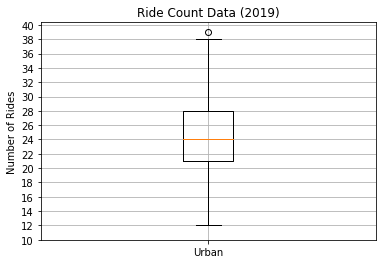

In [46]:
# 5.4.4 Create a box-and-whisker plot for the urban cities ride count.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_count, labels=x_labels)
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,41, step=2))
ax.grid()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x26f8dd038b0>,
 'caps': [<matplotlib.lines.Line2D at 0x26f8dd03e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f8dd035b0>],
 'medians': [<matplotlib.lines.Line2D at 0x26f8dd13400>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f8dd136d0>],
 'means': []}

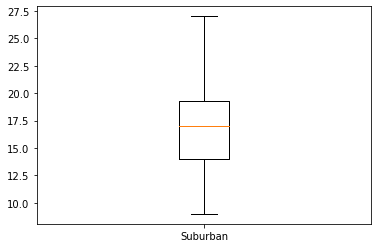

In [47]:
# skill drill 5.4.4 - suburban and rural
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_count, labels=x_labels)

{'whiskers': [<matplotlib.lines.Line2D at 0x26f8dd73400>,
 'caps': [<matplotlib.lines.Line2D at 0x26f8dd739a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26f8dd73100>],
 'medians': [<matplotlib.lines.Line2D at 0x26f8dd73f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x26f8dd7f280>],
 'means': []}

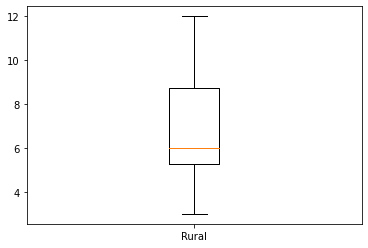

In [48]:
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_count, labels=x_labels)

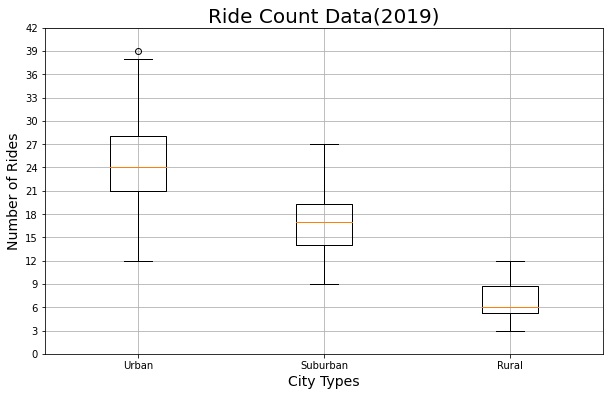

In [49]:
#  COMBINE

x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_count, suburban_count, rural_count]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_title("Ride Count Data(2019)", fontsize=20)
ax.set_ylabel("Number of Rides", fontsize=14)
ax.set_xlabel("City Types", fontsize=14)
ax.set_yticks(np.arange(0,45, step=3))
ax.grid()
plt.savefig("analysis/Fig2.png")
plt.show()


In [50]:
# find the city which is the outlier = 39 rides, urban
# find which ==39, filter by this, get the index
urban_outlier = urban_count[urban_count == 39].index[0]
urban_outlier

'West Angela'

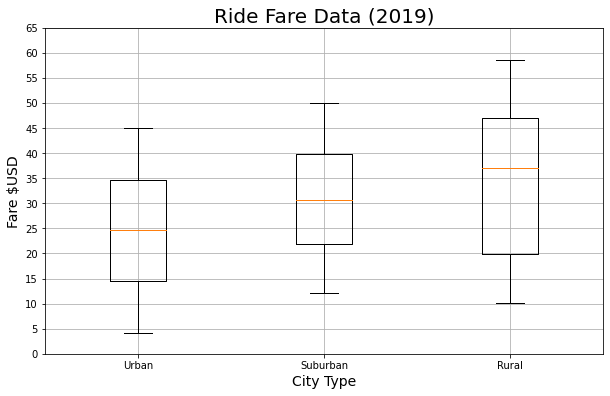

In [51]:
#  BWP for the fares by city type

x_labels = ["Urban", "Suburban", "Rural"]
fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(fare_data, labels=x_labels)
ax.set_title("Ride Fare Data (2019)", fontsize=20)
ax.set_ylabel("Fare $USD", fontsize =14)
ax.set_yticks(np.arange(0,70,step=5))
ax.set_xlabel("City Type", fontsize=14)
ax.grid()
plt.savefig("analysis/Fig3.png")
plt.show()

In [52]:
urban_drivers = urban_df["driver_count"]
urban_drivers

0        5
1       72
2       57
3       34
4       46
        ..
1620    67
1621    41
1622    11
1623     3
1624    57
Name: driver_count, Length: 1625, dtype: int64

In [53]:
mean_urban_drivers = np.mean(urban_drivers)
median_urban_drivers = np.median(urban_drivers)
mode_urban_drivers = sts.mode(urban_drivers)
print(mean_urban_drivers, median_urban_drivers, mode_urban_drivers)

36.67815384615385 37.0 ModeResult(mode=array([39], dtype=int64), count=array([86]))


In [54]:
mean_suburban_drivers = np.mean(suburban_drivers)
median_suburban_drivers = np.median(suburban_drivers)
mode_suburban_drivers = sts.mode(suburban_drivers)
print(mean_suburban_drivers, median_suburban_drivers, mode_suburban_drivers)

13.61111111111111 15.0 ModeResult(mode=array([20.]), count=array([5]))


In [55]:
mean_rural_drivers = np.mean(rural_drivers)
median_rural_drivers = np.median(rural_drivers)
mode_rural_drivers = sts.mode(rural_drivers)
print(mean_rural_drivers, median_rural_drivers, mode_rural_drivers)

4.333333333333333 4.0 ModeResult(mode=array([1.]), count=array([5]))


In [56]:
urban_drivers = urban_df.groupby(['city']).mean()["driver_count"]
suburban_drivers = suburban_df.groupby(["city"]).mean()["driver_count"]
rural_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

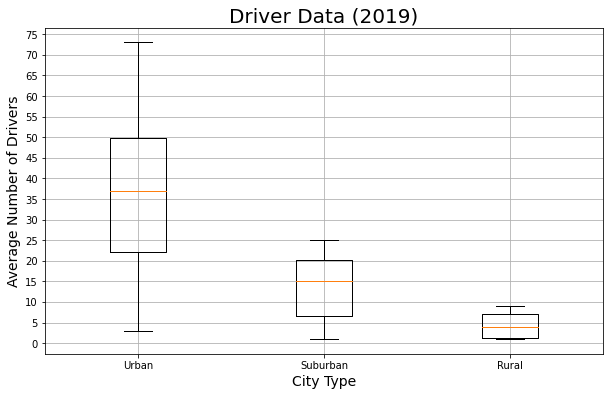

In [57]:
# Box-and-Whisker Plots for Driver Count Data
# Num drivers per city type

x_labels = ["Urban","Suburban","Rural"]
driver_data = [urban_drivers, suburban_drivers, rural_drivers]

fig, ax = plt.subplots(figsize=(10,6))
ax.boxplot(driver_data, labels=x_labels)
ax.set_title("Driver Data (2019)", fontsize=20)
ax.set_ylabel("Average Number of Drivers", fontsize=14)
ax.set_yticks(np.arange(0,80, step=5))
ax.set_xlabel("City Type", fontsize=14)
ax.grid()
plt.savefig("analysis/Fig4.png")
plt.show()


# this looks like the same graph as ride counts.  check data
# for driver data, are we summing or getting average?
# module says ave

In [58]:
# 5.5.1 GET PERCENTAGES FARE BY TYPE AND TOTAL FARES
# using numpy
total_fares = np.sum(pyber_df["fare"])
total_fares

# this works because np.sum is a thing and
# the "fare" data is numeric

63538.64

In [59]:
# using pandas
total_fares = pyber_df["fare"].sum()
total_fares

63538.64

In [60]:
sum_fares_bytype = pyber_df.groupby(["type"]).sum()["fare"]
sum_fares_bytype

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [61]:
sum_fares_bytype.info()

<class 'pandas.core.series.Series'>
Index: 3 entries, Rural to Urban
Series name: fare
Non-Null Count  Dtype  
--------------  -----  
3 non-null      float64
dtypes: float64(1)
memory usage: 156.0+ bytes


In [62]:
# get percentages

type_percents = 100 * sum_fares_bytype / total_fares
type_percents

# THIS IS THE ARRAY TO USE FOR THE PIE CHART

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [63]:
#  one line of code for both steps

type_percents = 100 * pyber_df.groupby(["type"]).sum()["fare"] / pyber_df["fare"].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [64]:
# what happens if ["fare"] is passed inside the .sum()
# looks same as .info() above?

sum_fares_bytype = pyber_df.groupby(["type"]).sum(["fare"])
sum_fares_bytype

,fare,ride_id,driver_count
type,,,
Rural,4327.93,580968240341287,537
Suburban,19356.33,3106884522576766,8570
Urban,39854.38,7919412664056093,59602


In [65]:
sum_fares_bytype.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, Rural to Urban
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fare          3 non-null      float64
 1   ride_id       3 non-null      int64  
 2   driver_count  3 non-null      int64  
dtypes: float64(1), int64(2)
memory usage: 96.0+ bytes


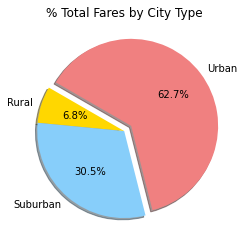

In [66]:
# MAKE PIE CHART
# IMPORTANT - order the labels in the order of the ARRAY - see above 
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)
plt.title("% Total Fares by City Type")
plt.show()




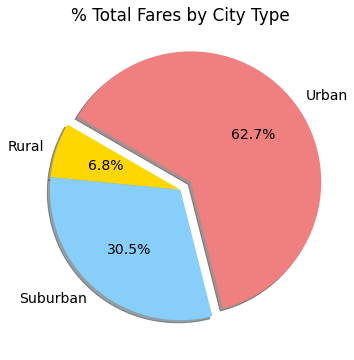

In [69]:
# to increase font size we need a different another dependency

import matplotlib as mpl

plt.subplots(figsize=(10,6))
plt.pie(type_percents, labels=["Rural", "Suburban", "Urban"],
       colors=["gold", "lightskyblue", "lightcoral"],
       explode=[0,0,0.1],
       autopct='%1.1f%%',
       shadow=True,
       startangle=150)

plt.title("% Total Fares by City Type")

# change default font size
mpl.rcParams['font.size'] = 14  # evidently the single quote is required here

plt.savefig("analysis/Fig5.png")
plt.show()


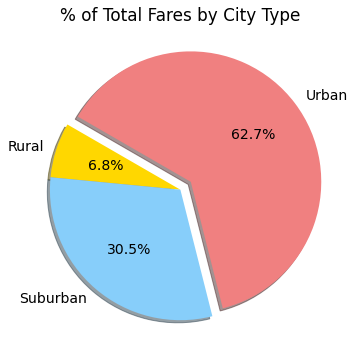

In [68]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Build Pie Chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig5.png")
# Show Figure
plt.show()

In [74]:
#  5.6.1 Get % rides by type

total_rides = np.count(pyber_df["ride_id"])
total_rides

# this doesn't work because np.count isn't a thing


AttributeError: module 'numpy' has no attribute 'count'

In [75]:
total_rides = pyber_df["ride_id"].count()
total_rides

2375

In [76]:
count_rides_bytype = pyber_df.groupby(["type"]).count()["ride_id"]
count_rides_bytype

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [78]:
# combine in one line of code

ride_percents = 100 * pyber_df.groupby(["type"]).count()["ride_id"] / pyber_df["ride_id"].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

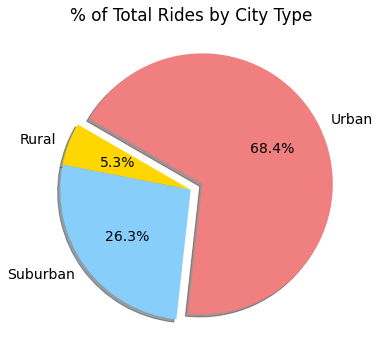

In [79]:
# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig6.png")
# Show Figure
plt.show()